# Step-by-step guide to room generation
In this section we will explain the algorithm for generating rooms using graph theory. 

First we create a graph of a matrix by memorizing the absolute distance between each node

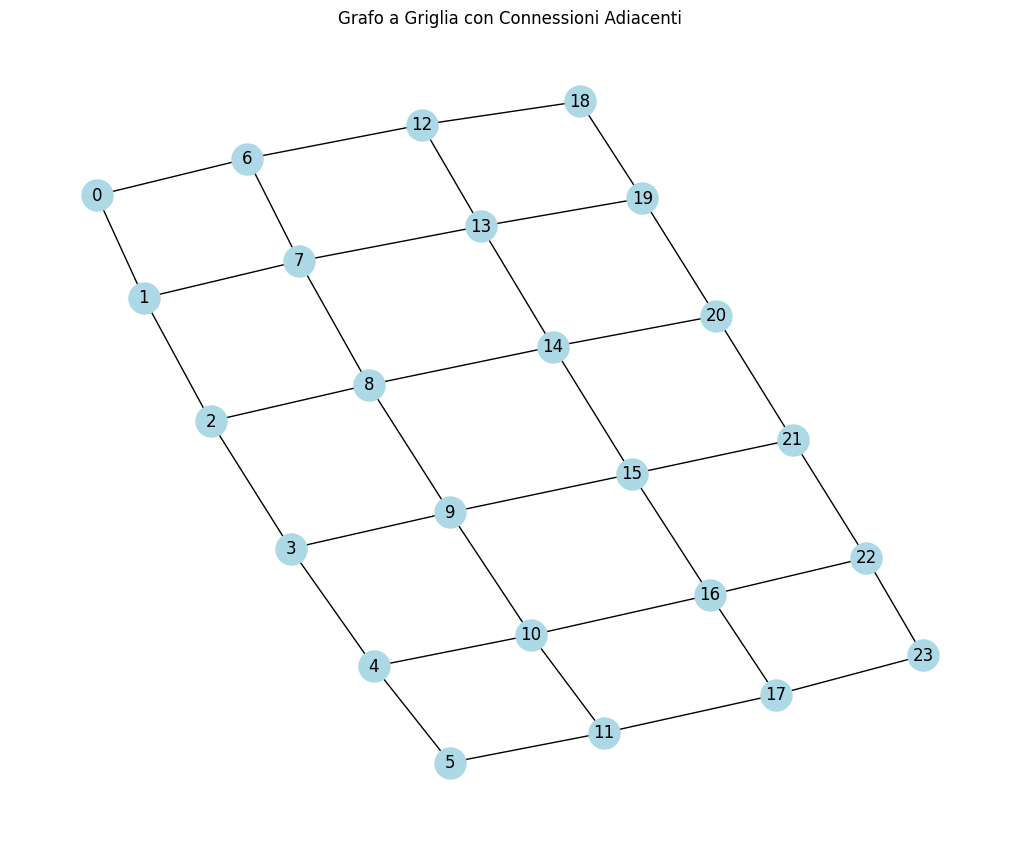

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def generate_grid_graph(rows, cols):
    # Creare un grafo vuoto
    G = nx.Graph()
    
    # Generare nodi in una struttura a griglia
    for r in range(rows):
        for c in range(cols):
            node_id = r * cols + c
            G.add_node(node_id)
    
    # Aggiungere connessioni tra nodi adiacenti
    for r in range(rows):
        for c in range(cols):
            current_node = r * cols + c
            
            # Connessione destra
            if c < cols - 1:
                G.add_edge(current_node, current_node + 1)
            
            # Connessione sotto
            if r < rows - 1:
                G.add_edge(current_node, current_node + cols)
    
    # Calcolare le distanze tra tutti i nodi
    distances = dict(nx.all_pairs_shortest_path_length(G))
    
    # Stampare la disposizione dei nodi
    #print("Disposizione dei nodi:")
    #for r in range(rows):
    #    row_nodes = [r * cols + c for c in range(cols)]
    #    print(" ".join(map(str, row_nodes)))
    
    #print("\nConnessioni e distanze:")
    for node in G.nodes():
        # Trovare tutti i percorsi verso altri nodi
        connections = [f"nodo {target} (distanza {distances[node][target]})" 
                       for target in G.nodes() if target != node]
        #print(f"Nodo {node}: {', '.join(connections)}")
    
    # Visualizzare il grafo
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    plt.title("Grafo a Griglia con Connessioni Adiacenti")
    plt.show()
    
    return G

# Esempio di utilizzo
rows = 4
cols = 6
grafo = generate_grid_graph(rows, cols)

Now we remove some connection between each node to make the environment more random

Disposizione dei nodi:
0 1 2 3 4 5
6 7 8 9 10 11
12 13 14 15 16 17
18 19 20 21 22 23


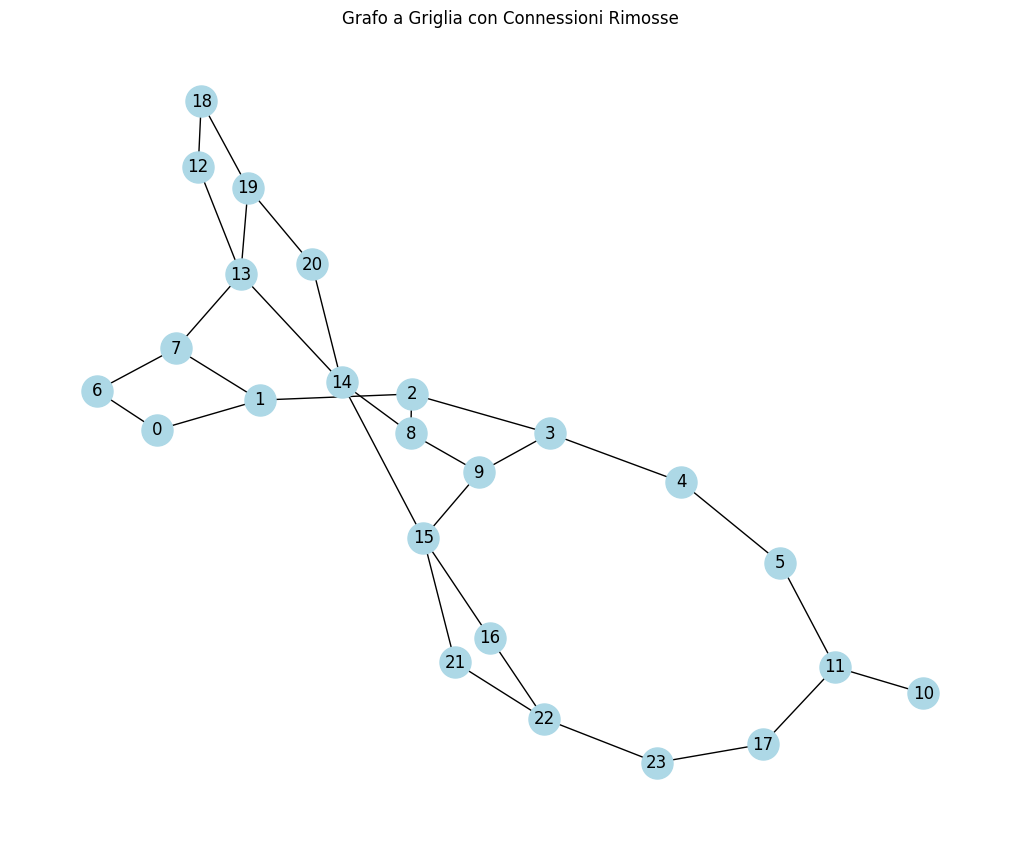

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_grid_graph(rows, cols):
    # Creare un grafo vuoto
    G = nx.Graph()
    
    # Generare nodi in una struttura a griglia
    for r in range(rows):
        for c in range(cols):
            node_id = r * cols + c
            G.add_node(node_id)
    
    # Dizionario per memorizzare i nodi adiacenti
    adjacent_nodes = {}
    
    # Aggiungere connessioni tra nodi adiacenti
    for r in range(rows):
        for c in range(cols):
            current_node = r * cols + c
            adjacent = []
            
            # Connessione destra
            if c < cols - 1:
                right_node = current_node + 1
                G.add_edge(current_node, right_node)
                adjacent.append(right_node)
            
            # Connessione sinistra
            if c > 0:
                left_node = current_node - 1
                adjacent.append(left_node)
            
            # Connessione sotto
            if r < rows - 1:
                down_node = current_node + cols
                G.add_edge(current_node, down_node)
                adjacent.append(down_node)
            
            # Connessione sopra
            if r > 0:
                up_node = current_node - cols
                adjacent.append(up_node)
            
            # Memorizzare i nodi adiacenti
            adjacent_nodes[current_node] = adjacent
    
    # Rimuovere connessioni in modo selettivo
    for node in list(G.nodes()):
        # Ottenere i vicini attuali
        current_neighbors = list(G.neighbors(node))
        
        # Numero massimo di connessioni da rimuovere
        max_removals = len(current_neighbors)
        
        # Numero casuale di connessioni da rimuovere
        num_removals = random.randint(0, 1)#max_removals)
        
        # Tentativi di rimozione
        for _ in range(num_removals):
            if len(current_neighbors) > 1:  # Assicurarsi di mantenere almeno una connessione
                # Scegliere un vicino casuale da rimuovere
                neighbor_to_remove = random.choice(current_neighbors)
                
                # Simulare la rimozione e verificare la connettività
                G_temp = G.copy()
                G_temp.remove_edge(node, neighbor_to_remove)
                
                # Verificare che la rimozione non isoli nessun nodo
                if nx.is_connected(G_temp):
                    G = G_temp
                    current_neighbors.remove(neighbor_to_remove)
    
    # Aggiornare il dizionario dei nodi adiacenti dopo la rimozione
    adjacent_nodes = {node: list(G.neighbors(node)) for node in G.nodes()}
    
    # Stampare la disposizione dei nodi
    print("Disposizione dei nodi:")
    for r in range(rows):
        row_nodes = [r * cols + c for c in range(cols)]
        print(" ".join(map(str, row_nodes)))
    
    # Stampare i nodi adiacenti
    # print("\nNodi adiacenti:")
    # for node, neighbors in adjacent_nodes.items():
    #     print(f"Nodo {node}: {neighbors}")
    
    # Calcolare le distanze tra tutti i nodi
    distances = dict(nx.all_pairs_shortest_path_length(G))
    
    # print("\nConnessioni e distanze:")
    # for node in G.nodes():
    #     # Trovare tutti i percorsi verso altri nodi
    #     connections = [f"nodo {target} (distanza {distances[node][target]})" 
    #                    for target in G.nodes() if target != node]
    #     print(f"Nodo {node}: {', '.join(connections)}")
    
    # Visualizzare il grafo
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    plt.title("Grafo a Griglia con Connessioni Rimosse")
    plt.show()
    
    return G, adjacent_nodes

# Esempio di utilizzo
rows = 4
cols = 6
grafo, nodi_adiacenti = generate_grid_graph(rows, cols)

We have now saved a dictionary with the relative distances between each node and with some connections removed.